In [1]:
import json
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import cm

/Users/marti/.pyenv/versions/3.9.6/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
with open("index.json", "r") as f:
    index = json.load(f)

In [3]:
embeddings = []
names = []
source_code = []
paths = []

for path, data in index.items():
    for name, _data in data.items():
        code = _data["source_code"]
        embedding = _data["embedding"]
        names.append(name)
        embeddings.append(embedding)
        paths.append(path)
        source_code.append(code)

In [4]:
ar_embeddings = np.array(embeddings)

In [5]:
tsne = TSNE(
    n_components=2,
    init="pca",
    random_state=0,
    perplexity=15,
    learning_rate="auto",
    n_iter=4000,
)
Y = tsne.fit_transform(ar_embeddings)

/Users/marti/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [6]:
uniq_paths = list(set(paths))
colors = cm.get_cmap('viridis', len(uniq_paths))

colors = dict(zip(uniq_paths, list(colors(range(len(uniq_paths))))))

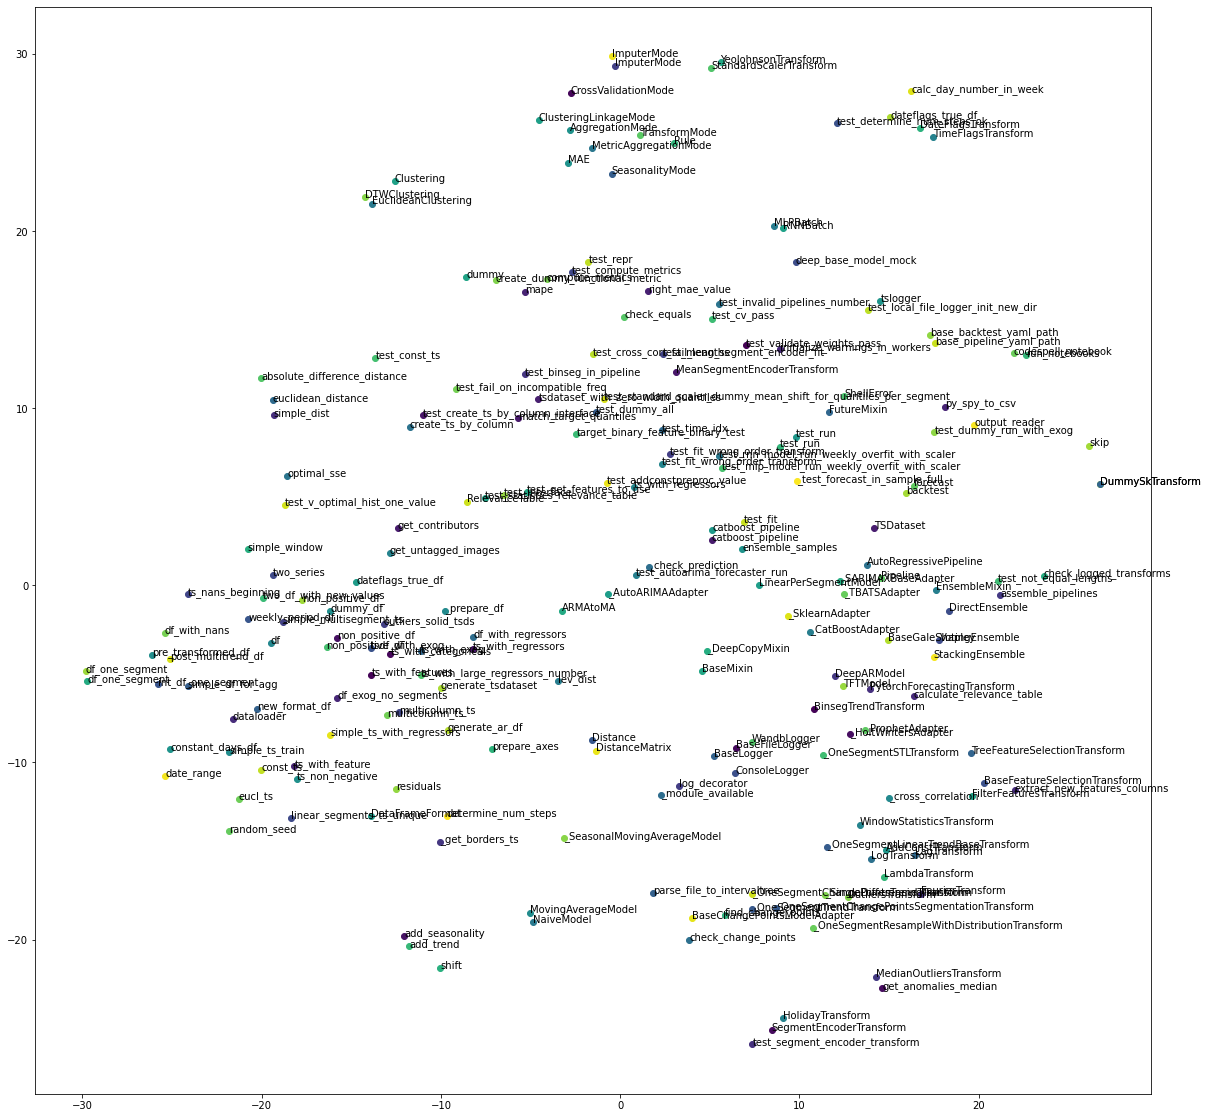

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
for i in range(len(Y)):
    ax.scatter(Y[i, 0], Y[i, 1], color=colors[paths[i]])

for i, txt in enumerate(names):
    ax.annotate(txt, (Y[i, 0], Y[i, 1]))

In [8]:
from scipy.spatial import distance_matrix

In [9]:
normalized = ar_embeddings / np.sqrt(np.sum(ar_embeddings * ar_embeddings, axis=1, keepdims=True))

In [10]:
normalized.shape

(211, 768)

In [11]:
dm = distance_matrix(normalized, normalized)


<AxesSubplot:>

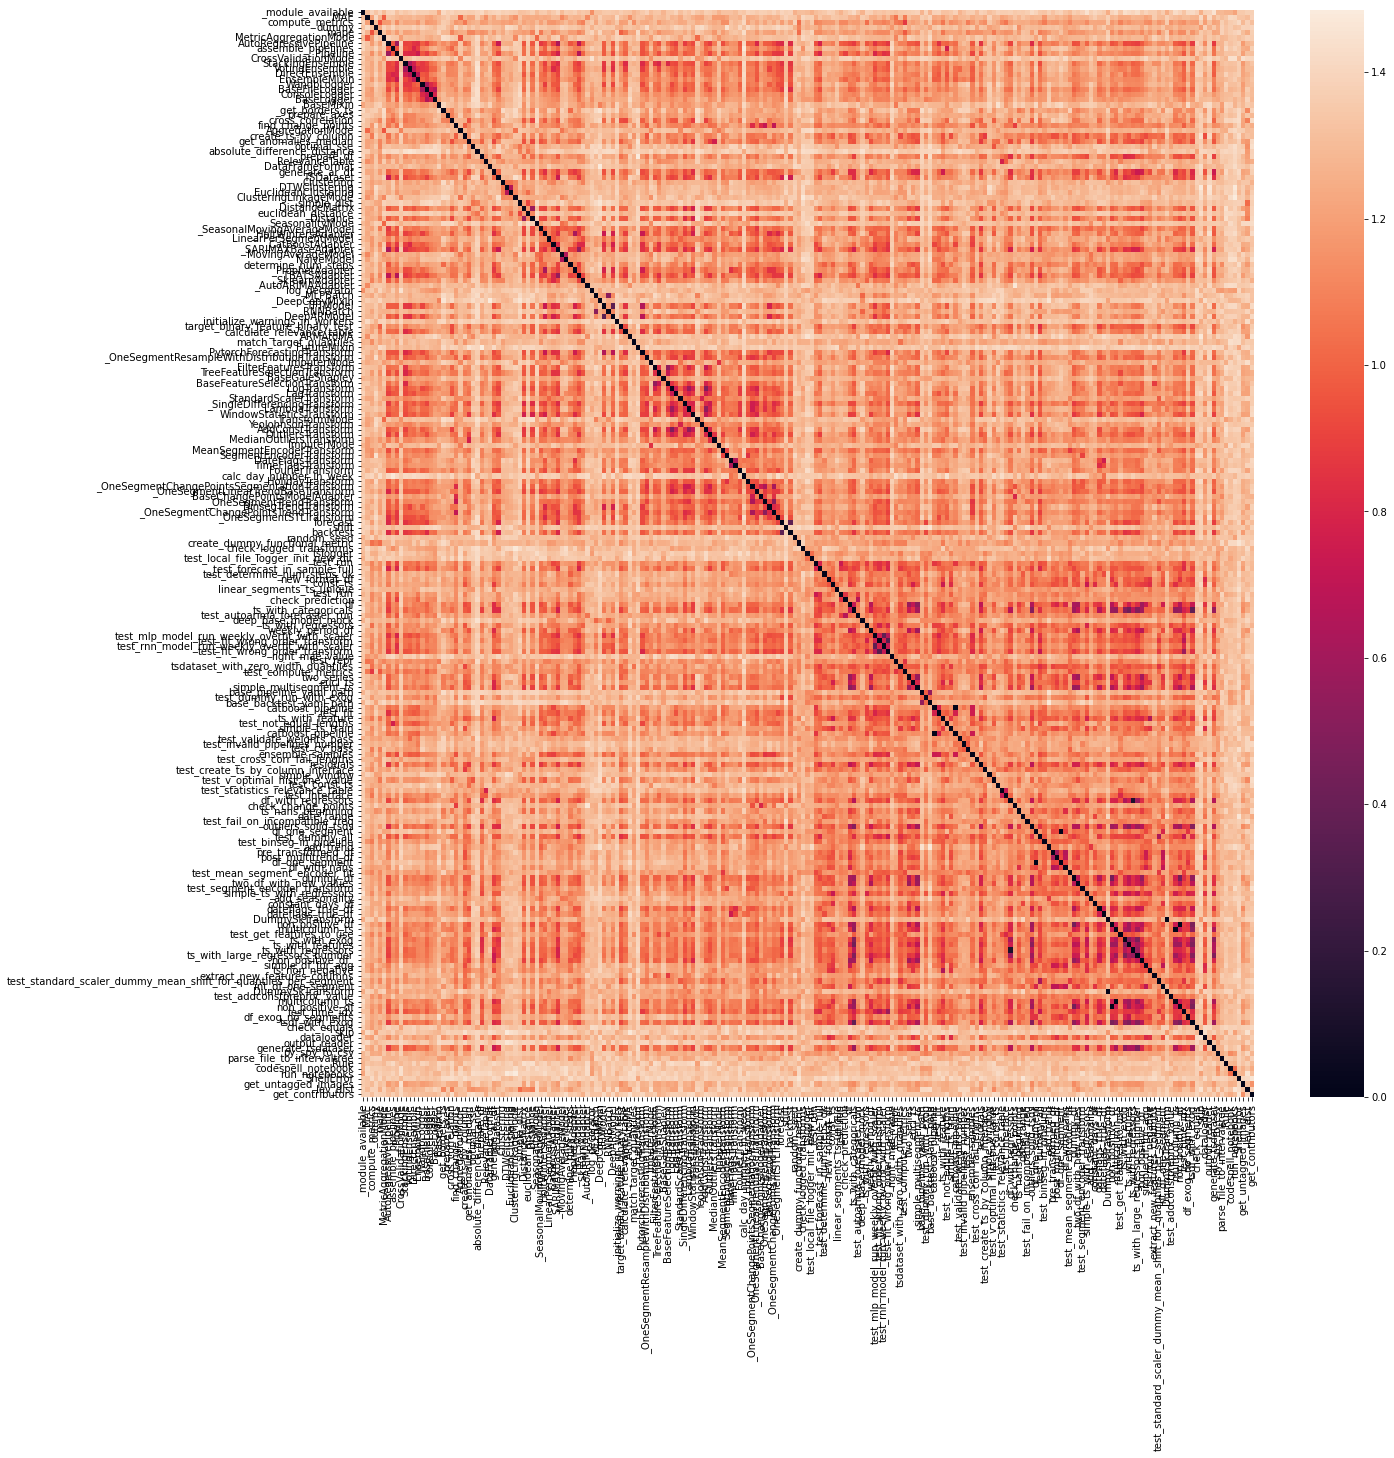

In [12]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(dm, xticklabels=names, yticklabels=names, ax=ax)

<AxesSubplot:ylabel='Count'>

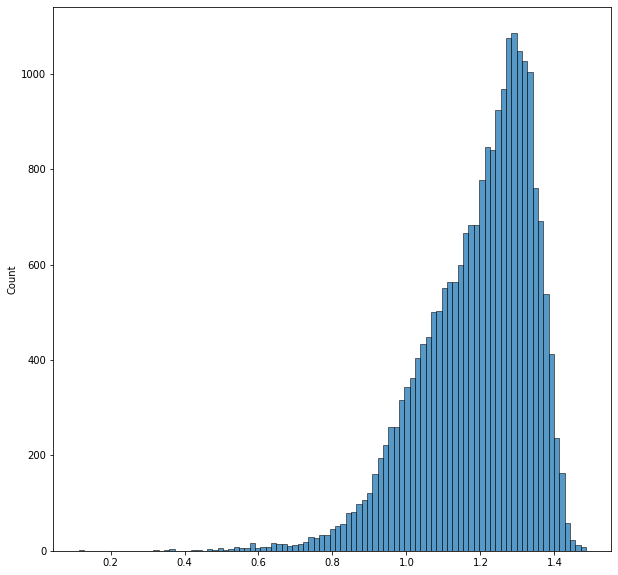

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.histplot(dm[np.tril(dm)> 0], ax=ax)

In [14]:
threshold = np.quantile(dm[np.tril(dm) > 0], 0.025)

In [15]:
counter = 25
for (x, y) in sorted(zip(*np.where(dm < threshold)), key=lambda x: dm[x[0], x[1]]):
    if x >= y : continue
    print(names[x], names[y], dm[x, y])
    counter -= 1
    if counter == 0:
        break

catboost_pipeline catboost_pipeline 0.0
df_one_segment df_one_segment 0.0
DummySkTransform DummySkTransform 0.0
non_positive_df non_positive_df 0.0
multicolumn_ts multicolumn_ts 0.0
df_with_regressors ts_with_regressors 0.11392796430723778
test_fit_wrong_order_transform test_fit_wrong_order_transform 0.33037642272553885
TFTModel DeepARModel 0.35812595736193986
forecast backtest 0.35970689978581727
test_mlp_model_run_weekly_overfit_with_scaler test_rnn_model_run_weekly_overfit_with_scaler 0.36346366350285536
ts_with_categoricals tsdf_with_exog 0.3733322274206386
ts_with_categoricals ts_with_features 0.42791098203575556
dummy_df non_positive_df 0.4400442271308296
dummy_df non_positive_df 0.4400442271308296
ts_with_exog ts_with_large_regressors_number 0.46293035771186775
non_positive_df tsdf_with_exog 0.46650758028656336
non_positive_df tsdf_with_exog 0.46650758028656336
LogTransform AddConstTransform 0.4777517440727569
ts_with_features tsdf_with_exog 0.48000965869264395
ts_with_large_reg